# Project: Predicting autism diagnosis from fMRI data

In [428]:
#ajout de commentaires: test pour gihhub push!!!
#import librairies
import os
import pandas as pd
import nibabel as nib
import nilearn as nl
import seaborn as sns
from nilearn import plotting as nlp
from nilearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import argparse
from argparse import ArgumentParser

import plotly
import plotly.graph_objects as go
import chart_studio
import chart_studio.plotly as py
from chart_studio import tools
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)
from sklearn.model_selection import validation_curve
from sklearn.svm import SVC

In [394]:
pip freeze

asn1crypto==1.3.0
attrs==19.3.0
backcall==0.1.0
bleach==3.1.4
certifi==2020.4.5.1
cffi==1.14.0
chardet==3.0.4
chart-studio==1.1.0
colorlover==0.3.0
conda==4.8.3
conda-package-handling==1.6.0
cryptography==2.8
cufflinks==0.17.3
cycler==0.10.0
decorator==4.4.2
defusedxml==0.6.0
docopt==0.6.2
entrypoints==0.3
flake8==3.7.9
h5py==2.10.0
idna==2.8
importlib-metadata==1.5.0
ipykernel==5.1.4
ipython==7.13.0
ipython-genutils==0.2.0
ipywidgets==7.5.1
jedi==0.17.0
Jinja2==2.11.2
joblib==0.14.1
json5==0.9.4
jsonschema==3.2.0
jupyter==1.0.0
jupyter-client==6.1.3
jupyter-console==6.1.0
jupyter-core==4.6.3
jupyterlab==1.2.6
jupyterlab-server==1.1.1
kiwisolver==1.2.0
MarkupSafe==1.1.1
matplotlib==3.1.3
mccabe==0.6.1
mistune==0.8.4
mkl-fft==1.0.15
mkl-random==1.1.0
mkl-service==2.3.0
nbconvert==5.6.1
nbformat==5.0.6
nibabel==3.1.0
nilearn==0.6.2
notebook==6.0.3
numpy==1.18.1
packaging==20.3
pandas==1.0.3
pandocfilters==1.4.2
parso==0.7.0
patsy==0.5.1
pexpect==4.8.0
pickleshare==0.7.5
pipreqs==0.4.10
p

In [427]:
import pkg_resources
pckg=[]

# list packages to be checked
root_packages = ['argparse','nilearn', 'numpy',
    'pandas','scikit-learn']
pckg.append('argparse=={}'.format(argparse.__version__))

# print versions, but check if package is imported first
for m in pkg_resources.working_set:
    if m.project_name.lower() in root_packages:
        
        pckg.append(f"{m.project_name}=={m.version}")
print(pckg)

#np.savetxt('requirements.txt', pckg, delimiter=" ", fmt="%s")

['argparse==1.1', 'scikit-learn==0.22.1', 'pandas==1.0.3', 'numpy==1.18.1', 'nilearn==0.6.2']


# Data exploration with static plotting

In [194]:
data=nl.datasets.fetch_abide_pcp()

/home/anproulx/miniconda3/lib/python3.7/site-packages/numpy/lib/npyio.py:2372: VisibleDeprecationWarning:

Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.



In [429]:
data.keys()

#len(data.func_preproc) 

dict_keys(['description', 'phenotypic', 'func_preproc'])

In [430]:
pheno=pd.DataFrame(data.phenotypic)
phen=pheno.drop("Unnamed_0", axis=1)

phen.head()

i  SUB_ID  X  subject  SITE_ID          FILE_ID  DX_GROUP  DSM_IV_TR  \
0  1   50003  2    50003  b'PITT'  b'Pitt_0050003'         1          1   
1  2   50004  3    50004  b'PITT'  b'Pitt_0050004'         1          1   
2  3   50005  4    50005  b'PITT'  b'Pitt_0050005'         1          1   
3  4   50006  5    50006  b'PITT'  b'Pitt_0050006'         1          1   
4  5   50007  6    50007  b'PITT'  b'Pitt_0050007'         1          1   

   AGE_AT_SCAN  SEX HANDEDNESS_CATEGORY  HANDEDNESS_SCORES    FIQ  VIQ  PIQ  \
0        24.45    1                b'R'                NaN  124.0  128  115   
1        19.09    1                b'R'                NaN  113.0  108  117   
2        13.73    2                b'R'                NaN  119.0  117  118   
3        13.37    1                b'L'                NaN  109.0   99  119   
4        17.78    1                b'R'                NaN  110.0  106  112   

  FIQ_TEST_TYPE VIQ_TEST_TYPE PIQ_TEST_TYPE  ADI_R_SOCIAL_TOTAL_A  \
0       b'WASI'       b'WASI'       b'WASI'                    27   
1       b'WASI'       b'WASI'       b'WASI'                    19   
2       b'WASI'       b'WASI'       b'WASI'                    23   
3       b'WASI'       b'WASI'       b'WASI'                    13   
4       b'WASI'       b'WASI'       b'WASI'                    21   

   ADI_R_VERBAL_TOTAL_BV  ADI_RRB_TOTAL_C  ADI_R_ONSET_TOTAL_D  \
0                     22                5                    3   
1                     12                5                    3   
2                     19                3                    4   
3                     10                4                    3   
4                     14                9                    1   

   ADI_R_RSRCH_RELIABLE  ADOS_MODULE  ADOS_TOTAL  ADOS_COMM  ADOS_SOCIAL  \
0                     1            4          13          5            8   
1                     1            4          18          6           12   
2                     1            4          12          4            8   
3                     1            4          12          4            8   
4                     1            3          17          5           12   

   ADOS_STEREO_BEHAV  ADOS_RSRCH_RELIABLE  ADOS_GOTHAM_SOCAFFECT  \
0                  1                    1                     -1   
1                  2                    1                     -1   
2                  1                    1                     -1   
3                  4                    1                     -1   
4                  2                    1                     -1   

   ADOS_GOTHAM_RRB  ADOS_GOTHAM_TOTAL  ADOS_GOTHAM_SEVERITY  SRS_VERSION  \
0               -1                 -1                    -1           -1   
1               -1                 -1                    -1           -1   
2               -1                 -1                    -1           -1   
3               -1                 -1                    -1           -1   
4               -1                 -1                    -1           -1   

   SRS_RAW_TOTAL  SRS_AWARENESS  SRS_COGNITION  SRS_COMMUNICATION  \
0             -1             -1             -1                 -1   
1             -1             -1             -1                 -1   
2             -1             -1             -1                 -1   
3             -1             -1             -1                 -1   
4             -1             -1             -1                 -1   

   SRS_MOTIVATION  SRS_MANNERISMS  SCQ_TOTAL  AQ_TOTAL COMORBIDITY  \
0              -1              -1         -1        -1         b''   
1              -1              -1         -1        -1         b''   
2              -1              -1         -1        -1         b''   
3              -1              -1         -1        -1         b''   
4              -1              -1         -1        -1         b''   

  CURRENT_MED_STATUS MEDICATION_NAME  OFF_STIMULANTS_AT_SCAN  \
0               b'1'   b'Fluoxetine'      

In [432]:
#replace encoded values with labels

pheno_lab= phen["DX_GROUP"].replace([1 , 2], ["autism", "control"]) #1 is autism, 2 is control
phen["DX_GROUP"]=pheno_lab

pheno_lab= phen["SEX"].replace([1 , 2], ["male", "female"]) #1 is male, 2 is female
phen["SEX"]=pheno_lab

pheno_lab= phen["DSM_IV_TR"].replace([0 , 1 , 2 , 3 , 4 , -9999], ["control", "autism" , "asperger" , "PPD-NOS", "Asperger or PPD-NOS", "NaN"]) #O is control, 1 is autism, 2 is Asperger, 3 is PPD-NOS, 4 is Asperger or PPD-NOS
phen["DSM_IV_TR"]=pheno_lab

pd.set_option('display.max_columns', 500)
phen.head()

i  SUB_ID  X  subject  SITE_ID          FILE_ID DX_GROUP DSM_IV_TR  \
0  1   50003  2    50003  b'PITT'  b'Pitt_0050003'   autism    autism   
1  2   50004  3    50004  b'PITT'  b'Pitt_0050004'   autism    autism   
2  3   50005  4    50005  b'PITT'  b'Pitt_0050005'   autism    autism   
3  4   50006  5    50006  b'PITT'  b'Pitt_0050006'   autism    autism   
4  5   50007  6    50007  b'PITT'  b'Pitt_0050007'   autism    autism   

   AGE_AT_SCAN     SEX HANDEDNESS_CATEGORY  HANDEDNESS_SCORES    FIQ  VIQ  \
0        24.45    male                b'R'                NaN  124.0  128   
1        19.09    male                b'R'                NaN  113.0  108   
2        13.73  female                b'R'                NaN  119.0  117   
3        13.37    male                b'L'                NaN  109.0   99   
4        17.78    male                b'R'                NaN  110.0  106   

   PIQ FIQ_TEST_TYPE VIQ_TEST_TYPE PIQ_TEST_TYPE  ADI_R_SOCIAL_TOTAL_A  \
0  115       b'WASI'       b'WASI'       b'WASI'                    27   
1  117       b'WASI'       b'WASI'       b'WASI'                    19   
2  118       b'WASI'       b'WASI'       b'WASI'                    23   
3  119       b'WASI'       b'WASI'       b'WASI'                    13   
4  112       b'WASI'       b'WASI'       b'WASI'                    21   

   ADI_R_VERBAL_TOTAL_BV  ADI_RRB_TOTAL_C  ADI_R_ONSET_TOTAL_D  \
0                     22                5                    3   
1                     12                5                    3   
2                     19                3                    4   
3                     10                4                    3   
4                     14                9                    1   

   ADI_R_RSRCH_RELIABLE  ADOS_MODULE  ADOS_TOTAL  ADOS_COMM  ADOS_SOCIAL  \
0                     1            4          13          5            8   
1                     1            4          18          6           12   
2                     1            4          12          4            8   
3                     1            4          12          4            8   
4                     1            3          17          5           12   

   ADOS_STEREO_BEHAV  ADOS_RSRCH_RELIABLE  ADOS_GOTHAM_SOCAFFECT  \
0                  1                    1                     -1   
1                  2                    1                     -1   
2                  1                    1                     -1   
3                  4                    1                     -1   
4                  2                    1                     -1   

   ADOS_GOTHAM_RRB  ADOS_GOTHAM_TOTAL  ADOS_GOTHAM_SEVERITY  SRS_VERSION  \
0               -1                 -1                    -1           -1   
1               -1                 -1                    -1           -1   
2               -1                 -1                    -1           -1   
3               -1                 -1                    -1           -1   
4               -1                 -1                    -1           -1   

   SRS_RAW_TOTAL  SRS_AWARENESS  SRS_COGNITION  SRS_COMMUNICATION  \
0             -1             -1             -1                 -1   
1             -1             -1             -1                 -1   
2             -1             -1             -1                 -1   
3             -1             -1             -1                 -1   
4             -1             -1             -1                 -1   

   SRS_MOTIVATION  SRS_MANNERISMS  SCQ_TOTAL  AQ_TOTAL COMORBIDITY  \
0              -1              -1         -1        -1         b''   
1              -1              -1         -1        -1         b''   
2              -1              -1         -1        -1         b''   
3              -1              -1         -1        -1         b''   
4              -1              -1         -1        -1         b''   

  CURRENT_MED_STATUS MEDICATION_NAME  OFF_STIMULANTS_AT_SCAN  \
0               b'1'   b'Fluoxetine'

In [433]:
#pd.unique(phen["SITE_ID"])
phen=phen.replace ([b'PITT', b'OLIN', b'OHSU', b'SDSU', b'TRINITY', b'UM_1', b'UM_2',
       b'USM', b'YALE', b'CMU', b'LEUVEN_1', b'LEUVEN_2', b'KKI', b'NYU',
       b'STANFORD', b'UCLA_1', b'UCLA_2', b'MAX_MUN', b'CALTECH', b'SBL'], ['PITT', 'OLIN', 'OHSU', 'SDSU', 'TRINITY', 'UM_1', 'UM_2',
       'USM', 'YALE', 'CMU', 'LEUVEN_1', 'LEUVEN_2', 'KKI', 'NYU',
       'STANFORD', 'UCLA_1', 'UCLA_2', 'MAX_MUN', 'CALTECH', 'SBL'])

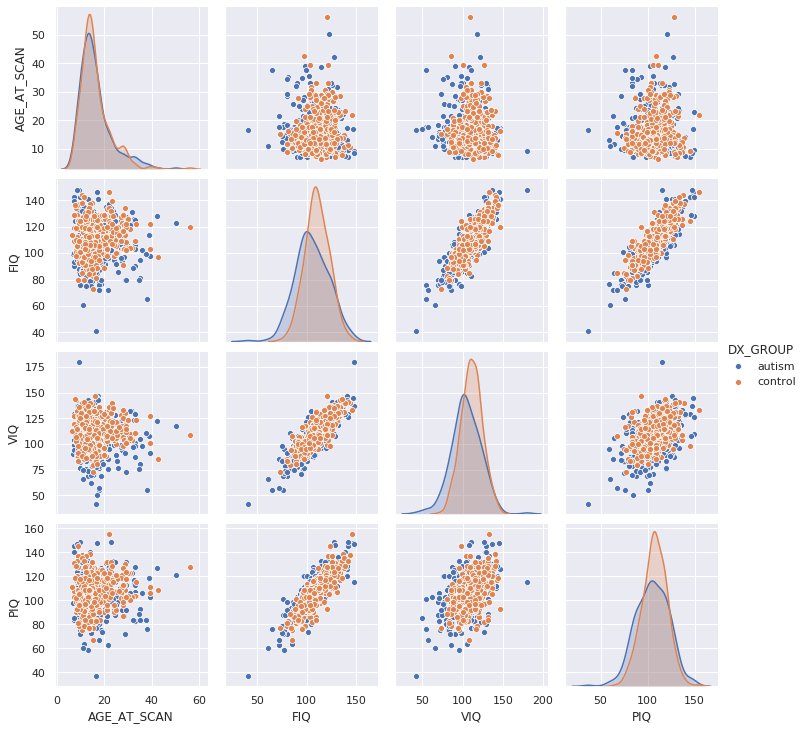

In [434]:
phen_miss=phen[["DX_GROUP", "SITE_ID", "DSM_IV_TR","AGE_AT_SCAN", "FIQ", "VIQ", "PIQ"]]

phen_miss=phen_miss.replace([-9999, "-9999", -1], ["NaN", "NaN", "NaN"])

pd.set_option('display.max_rows', 500)

#for all val in phen_miss: 
#    if val=="NaN":
#        phen_miss.drop([0, 1])
        
phen_miss= phen_miss.drop(phen_miss[phen_miss.FIQ =="NaN"].index)
phen_miss= phen_miss.drop(phen_miss[phen_miss.VIQ =="NaN"].index)
phen_miss= phen_miss.drop(phen_miss[phen_miss.PIQ =="NaN"].index)

pd.set_option('display.max_rows', 900)
phen_miss

#phen_miss_0= phen_miss[pd.notna(phen_miss['FIQ'])]

sns.set()
sns.pairplot(phen_miss, hue= "DX_GROUP", dropna=True)

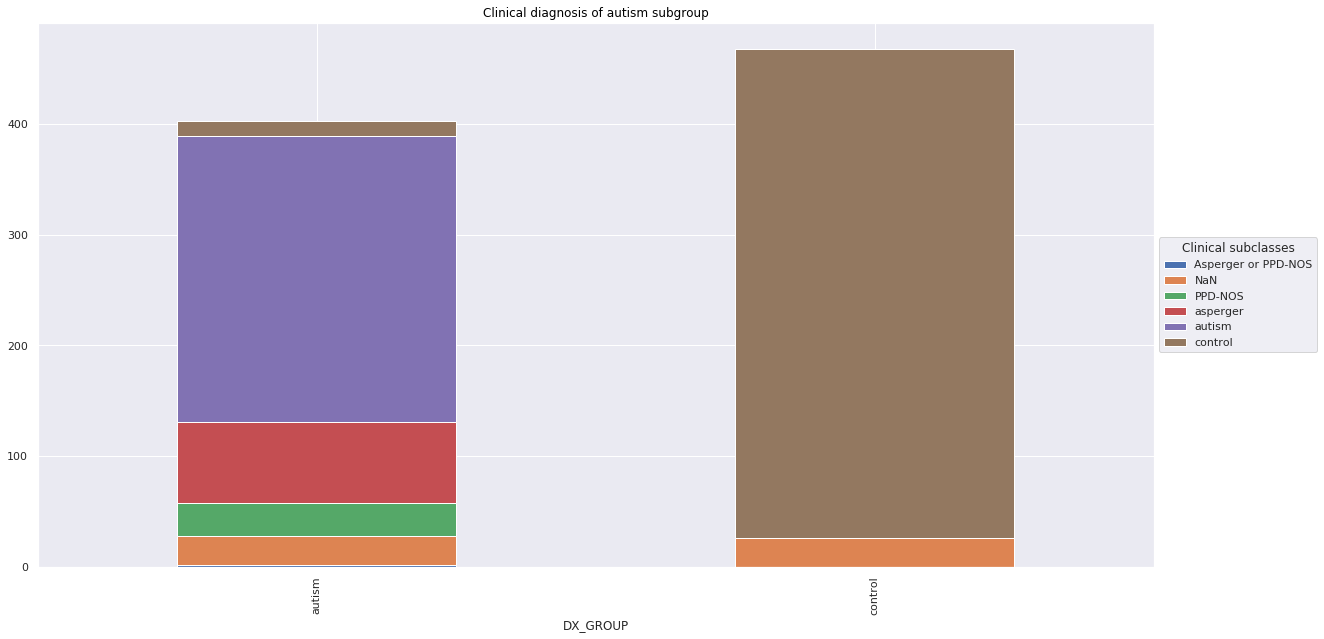

In [7]:
#clinical sub-classes of subjects classified as autistic
sns.set()

pd.crosstab(index=phen['DX_GROUP'],
                columns=phen['DSM_IV_TR']).plot.bar(stacked=True)

plt.title('Clinical diagnosis of autism subgroup', color='black')
plt.legend(title='Clinical subclasses', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.gcf().set_size_inches(20, 10)

/home/anproulx/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.



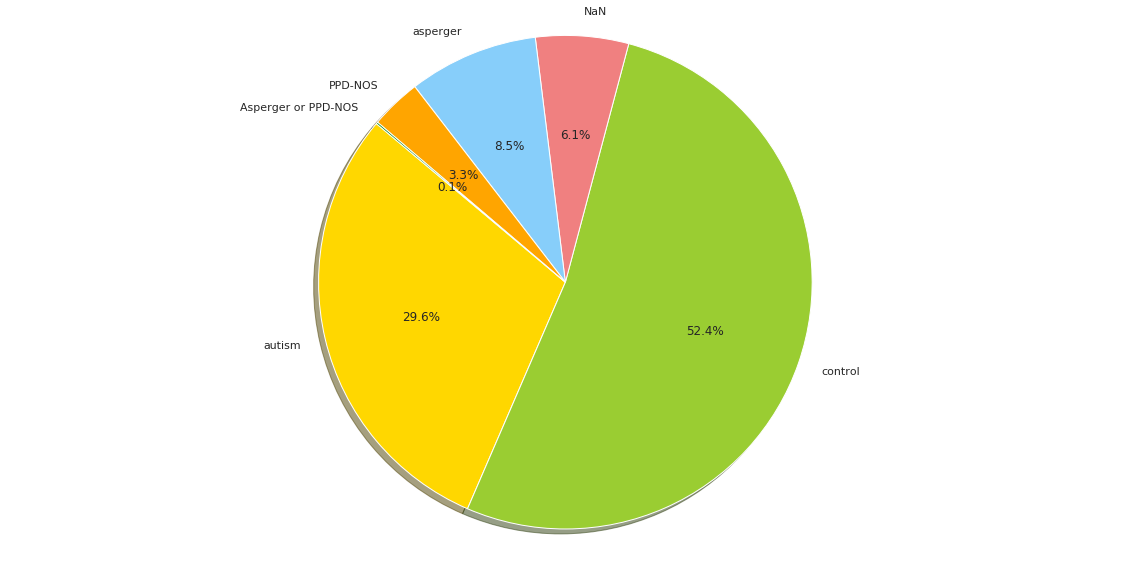

In [8]:
# Data to plot
sns.set()
labels = phen["DSM_IV_TR"].drop_duplicates()
#print(labels)

size=pd.DataFrame(phen["DSM_IV_TR"].groupby(phen["DSM_IV_TR"]).count())
resize= size.reindex(['autism', 'control', 'NaN', 'asperger', 'PPD-NOS', 'Asperger or PPD-NOS'])
#print(resize)

colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'orange', 'green']

# Plot
plt.pie(resize, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.gcf().set_size_inches(20, 10)

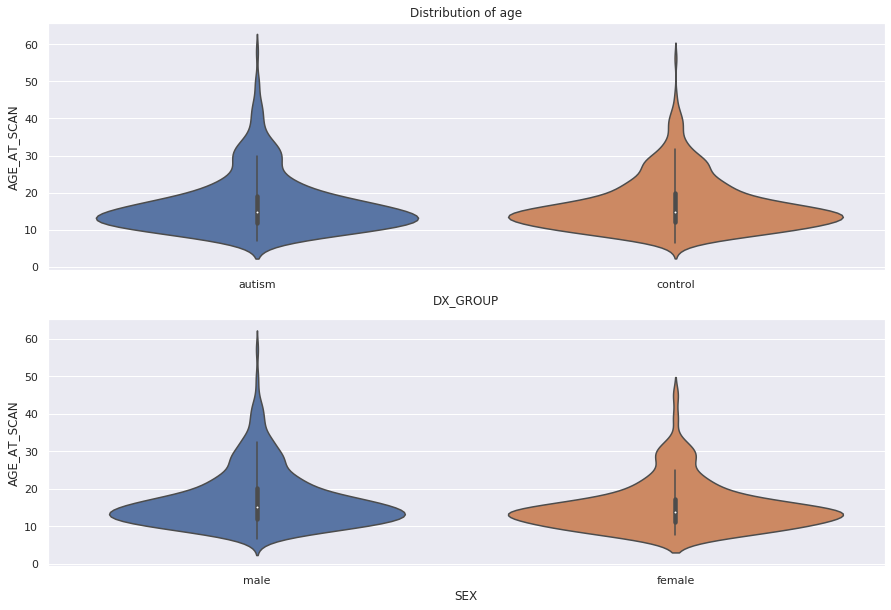

In [9]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15 , 10))

ax1 = plt.subplot(2,1,1) 
plt.title("Distribution of age")

sns.violinplot(x='DX_GROUP', 
            y = 'AGE_AT_SCAN',
            data = phen)

ax1 = plt.subplot(2,1,2) 
sns.violinplot(x='SEX', 
            y = 'AGE_AT_SCAN',
            data = phen)

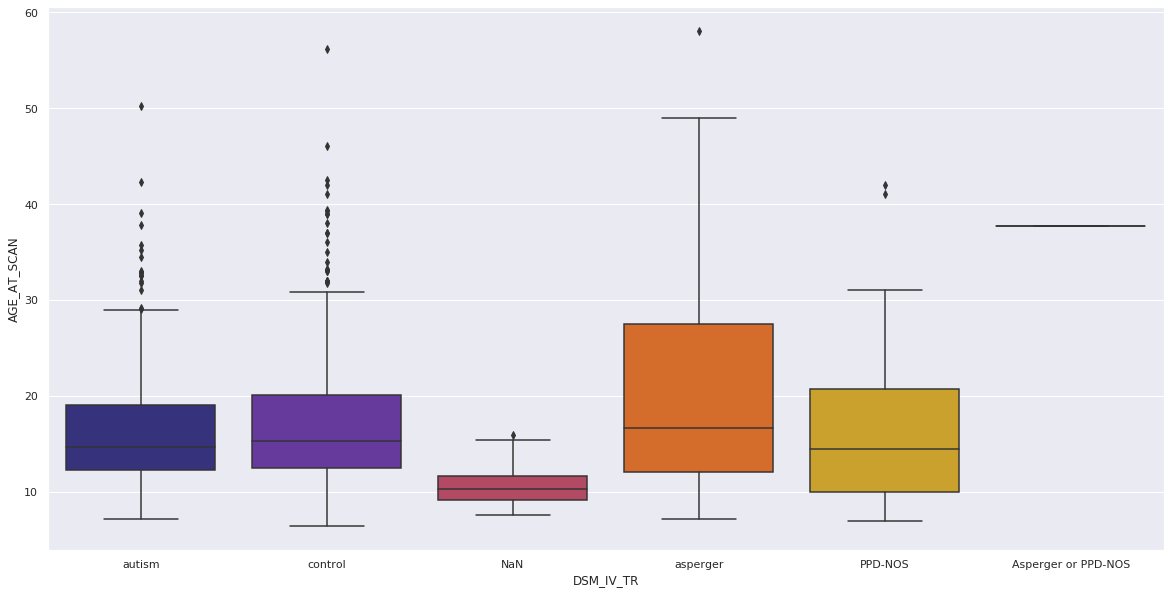

In [10]:
fig, ax = plt.subplots(figsize=(20 , 10))

sns.boxplot(x='DSM_IV_TR', 
            y = 'AGE_AT_SCAN',
            data = phen,
            palette = "CMRmap"
           )

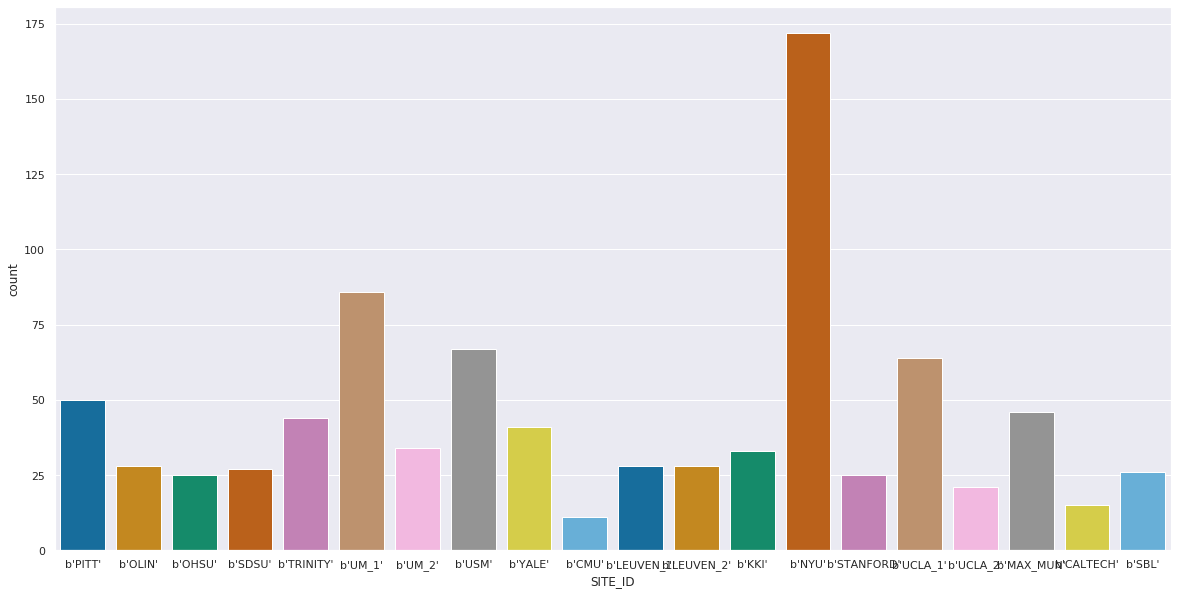

In [11]:
#Data on acquisition sites
fig, ax = plt.subplots(figsize=(20 , 10))
sns.countplot('SITE_ID', data=phen, palette="colorblind")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text xticklabel objects>)

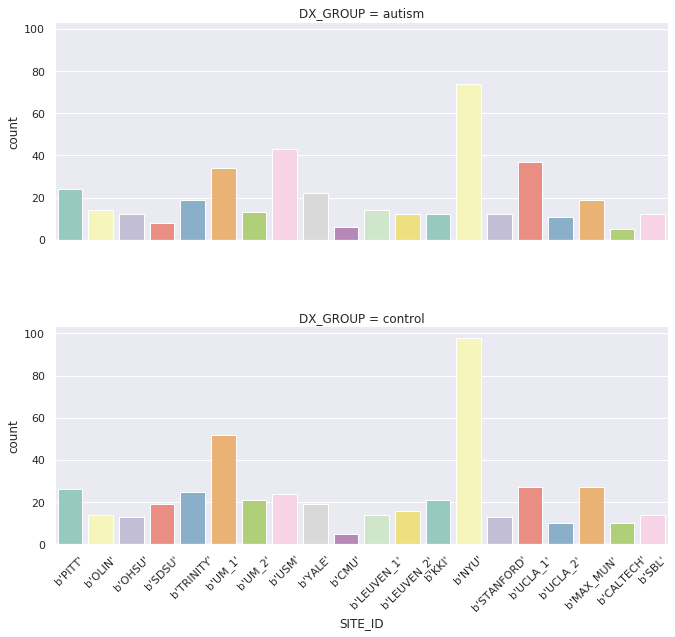

In [12]:
ax= sns.catplot(x="SITE_ID",
                data=phen, row="DX_GROUP", orient="h", height=2, aspect=3, palette="Set3",
                kind="count", dodge=True);

plt.gcf().set_size_inches(10, 10)
plt.xticks(rotation = 45)

# Data exploration with interactive plotting (Plotly)

In [65]:
#basic interactive plot
phen["SEX"].iplot(kind='hist', xTitle='Gender',
                  yTitle='Count', title='Count of f/m')

In [66]:
phen['DSM_IV_TR'].iplot(kind='hist', xTitle='Clinical condition',
                  yTitle='count', title='Clinical distribution', colors="blue")

In [67]:
phen.pivot(columns='DSM_IV_TR', values= "AGE_AT_SCAN").iplot(
        kind='box',
        yTitle='AGE_AT_SCAN',
        title='Age distribution in different clinical conditions')

In [68]:
from plotly.subplots import make_subplots

#fig = make_subplots(
#    rows=2, cols=1,
#    row_width=[0.33, 0.67],
#    start_cell="top-left")

#fig.add_bar(x=phen["DSM_IV_TR"], row=1, col=1)
#fig.add_bar(y=phen["DX_GROUP"], row=2, col=1)
#fig.show()

In [69]:
import plotly.express as px


fig = px.scatter(phen, x="AGE_AT_SCAN",  color="SITE_ID", title="Age distribution in different fmri acquisition site")

# If you print fig, you'll see that it's just a regular figure with data and layout
# print(fig)
fig.update_traces(
    line=dict(dash="dot", width=4),
    selector=dict(type="scatter", mode="lines"))

fig.show()

In [70]:
fig = px.scatter(phen, x="AGE_AT_SCAN", animation_frame="DSM_IV_TR", animation_group="SUB_ID", color="SITE_ID", hover_name="SUB_ID", facet_col="SEX",
           log_x=False, size_max=45, range_x=[1,100], range_y=[-5,100])
fig.show()

In [443]:
fig = px.box(phen, x="SITE_ID", y="AGE_AT_SCAN", color="SEX", notched=True)
fig.show()

In [136]:
#fig = px.scatter(phen, x="AGE_AT_SCAN",  color="SITE_ID", facet_col="SITE_ID", title="Age distribution in different fmri acquisition site")
#fig.show()

In [38]:
#make value into dictionary
phen_grby= phen.groupby(phen["SITE_ID"])

DEAL WITH MISSING DATA BEFORE GETTING INTO ML: EXCLUSION PARTICIPANT WITH MISSING DATA

In [72]:
#subset the features we are interested in

print(phen.shape)

phen_predict = phen[phen["DX_GROUP"]!="NaN"]
phen_predict.shape

#No missing data for DX_GROUP 

(871, 105)


(871, 105)

# Extracting the features (X) 

In [435]:
#fetch atlas for brain parcellation
parcellations = datasets.fetch_atlas_basc_multiscale_2015(version='sym')
atlas_filename = parcellations.scale064

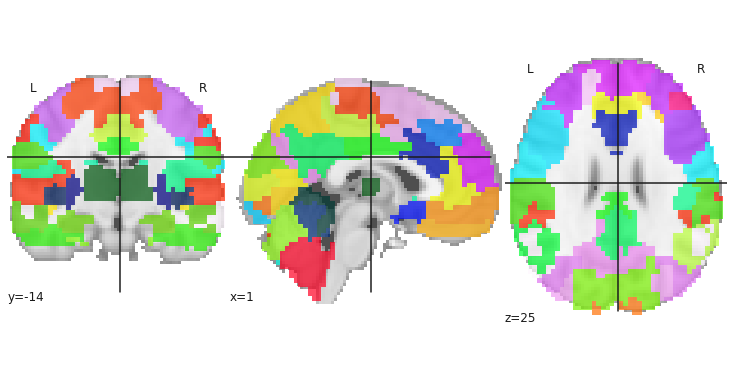

In [436]:
from nilearn import plotting

plotting.plot_roi(atlas_filename, draw_cross=True)
plt.gcf().set_size_inches(10, 5)

Preprocessing to create connectome for 1 subject, than will be implemented for all 800.. subjects

In [437]:
fmri_filenames = data.func_preproc[100] #100 subject in the folder
print(fmri_filenames)

/home/anproulx/nilearn_data/ABIDE_pcp/cpac/nofilt_noglobal/OHSU_0050169_func_preproc.nii.gz


In [76]:
from nilearn import image
from nilearn.image import load_img
im= load_img(fmri_filenames)

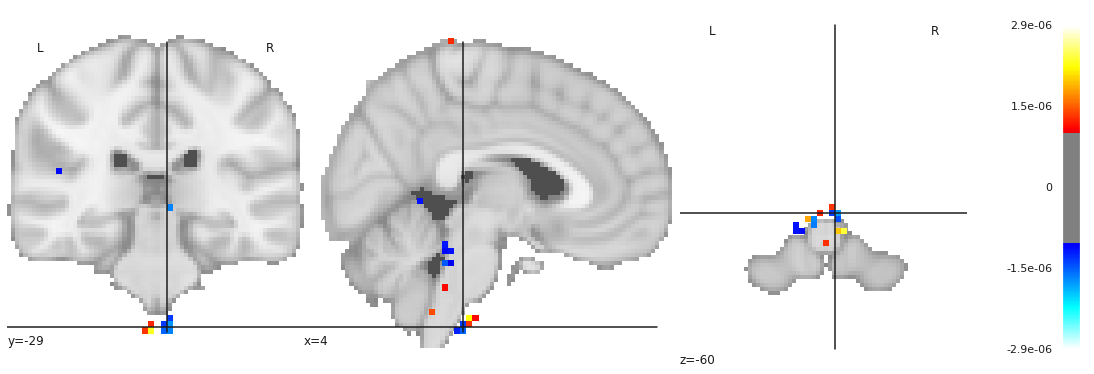

In [438]:
averaged_Img = image.mean_img(fmri_filenames)
plotting.plot_stat_map(averaged_Img)
plt.gcf().set_size_inches(15, 5)

In [439]:
#Extract features (what about the confounds, does the data contain any regressors?????)
from nilearn.input_data import NiftiLabelsMasker

masker = NiftiLabelsMasker(labels_img=atlas_filename, 
                           standardize=True, 
                           memory='nilearn_cache', 
                           verbose=1)

time_series = masker.fit_transform(fmri_filenames)

[NiftiLabelsMasker.fit_transform] loading data from /home/anproulx/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale064.nii.gz
Resampling labels


In [79]:
time_series.shape

(78, 64)

In [440]:
from nilearn.connectome import ConnectivityMeasure
correlation_measure = ConnectivityMeasure(kind='correlation')
correlation_matrix = correlation_measure.fit_transform([time_series])[0]
correlation_matrix.shape

(64, 64)

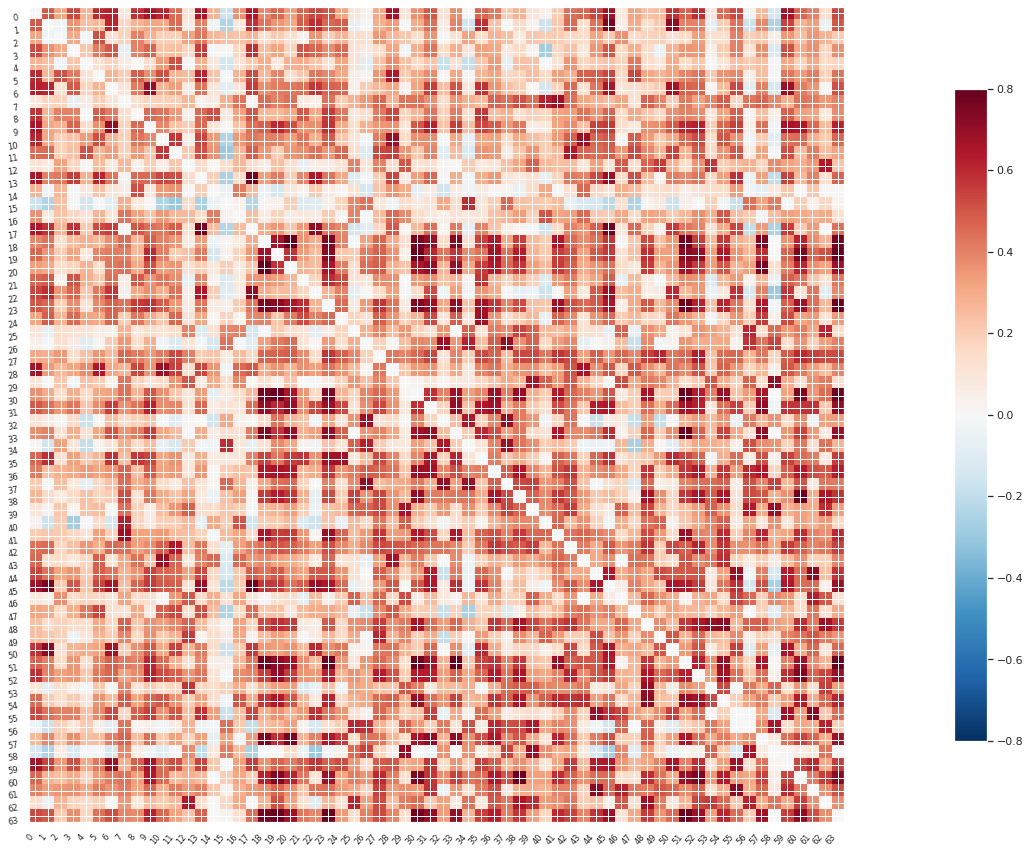

In [81]:
np.fill_diagonal(correlation_matrix, 0)
plotting.plot_matrix(correlation_matrix, figure=(25, 15),   
                     labels=range(time_series.shape[-1]),
                     vmax=0.8, vmin=-0.8, reorder=False) #reorder= True does clustering within the matrix

#remove grid

In [289]:
#print(correlation_matrix)

#extract half matrix
half_matrix=list(correlation_matrix[np.triu_indices(64)])
print(len(half_matrix))


#np.set_printoptions(threshold=np.inf)
#print(half_conn)


2080


In [82]:
import plotly.figure_factory as ff

corr= pd.DataFrame(correlation_matrix)

corrs = corr.corr()
figure = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    annotation_text=corrs.round(2).values,
    showscale=True)

figure.update_layout(
    autosize=False,
    width=2000,
    height=2000)

Extract features for ALL subjects: implement loop over funct_preproc files

In [321]:
half_features_1d = []
all_features_2d = []

for i,sub in enumerate(data.func_preproc):
    # extract the timeseries from the ROIs in the atlas
    time_series = masker.fit_transform(sub)
    
    # create a region x region correlation matrix
    correlation_matrix_2d = correlation_measure.fit_transform([time_series])[0]
    correlation_matrix_1d=list(correlation_matrix_2d[np.triu_indices(64)])
    
    #print(len(correlation_matrix))

    # add to our container
    half_features_1d.append(correlation_matrix_1d) # flat array of half matrix (2080, )
    all_features_2d.append(correlation_matrix_2d) # 2d matrix (64,64)
    
    # keep track of status
    print('finished %s of %s'%(i+1,len(data.func_preproc)))

[NiftiLabelsMasker.fit_transform] loading data from /home/anproulx/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale064.nii.gz
finished 1 of 871
[NiftiLabelsMasker.fit_transform] loading data from /home/anproulx/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale064.nii.gz
finished 2 of 871
[NiftiLabelsMasker.fit_transform] loading data from /home/anproulx/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale064.nii.gz
finished 3 of 871
[NiftiLabelsMasker.fit_transform] loading data from /home/anproulx/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale064.nii.gz
finished 4 of 871
[NiftiLabelsMasker.fit_transform] loading data from /home/anproulx/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multisc

In [322]:
#Reshape individual connectome to 1 dimension (flat array)

#half_matrix=list(correlation_matrix[np.triu_indices(64)])

#save to lacal space
np.savez_compressed('MAIN_BASC064_subsamp_connectomes_half_1d', a = half_features_1d)
np.savez_compressed('MAIN_BASC064_subsamp_connectomes_2d', a = all_features_2d)

In [323]:
feat_file = 'MAIN_BASC064_subsamp_connectomes_half_1d.npz'

X_features = np.load(feat_file)['a']
X_features.shape

#Since the matrix is symmetric, we only need to keep one half of the connectome!

(871, 2080)

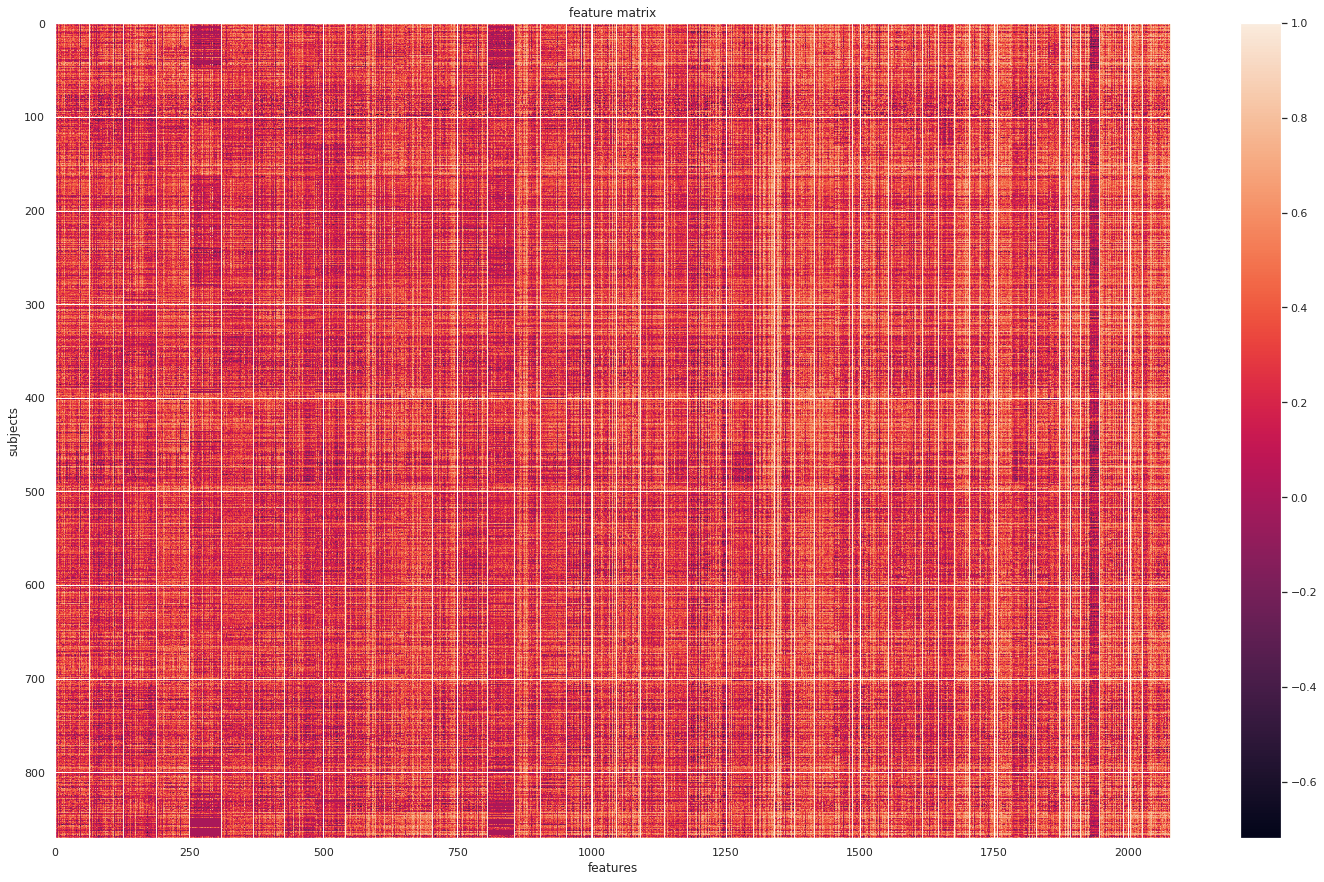

In [324]:
#plot feature matrix

import matplotlib.pyplot as plt

plt.imshow(X_features, aspect='auto')
plt.colorbar()
plt.title('feature matrix')
plt.xlabel('features')
plt.ylabel('subjects')

plt.gcf().set_size_inches(25, 15)

# Get the target vector (Y)

In [441]:
y=phen['DX_GROUP']

In [442]:
#basic interactive plot
phen["DX_GROUP"].iplot(kind='hist', xTitle='Status',
                  yTitle='Count', title='Count of controls/autism subjects')

# Predicting labels: probabilistic and non-probabilistic classification models

1. Choose a class of model
2. Choose model hyperparameters

Using cross validation: 

3. Fit the model to the training data
4. Predict labels for test data 
5. Evaluate the performance of the model

# Dimensionality reduction with PCA

PCA is fundamentally a
dimensionality reduction algorithm, but it can also be useful as a tool for visualization,
for noise filtering, for feature extraction and engineering, and much more. Using PCA for dimensionality reduction involves zeroing out one or more of the
smallest principal components, resulting in a lower-dimensional projection of the
data that preserves the maximal data variance.

In [203]:
sns.set()
from sklearn.decomposition import PCA

pca = PCA().fit(X_features)
#Around 800 components explains close 1,0 of the variance. Important reduction of features (4096 features initially) !!!

In [204]:
#make df with components and cumulative explained variance ratio
df_plotly=pd.DataFrame()
df_plotly["cumulative_variance_ratio_explained"]=np.cumsum(pca.explained_variance_ratio_)

fig = px.line(df_plotly, y="cumulative_variance_ratio_explained",
        line_shape="spline", render_mode="svg", title="Cumulative variance ratio explained represented as a function of n components")
fig.show()

In [325]:
from sklearn.decomposition import PCA
pca = PCA(0.99) #choose n components for 99% variance explained
pca.fit(X_features)
X_features_pca = pca.transform(X_features)


print("original shape: ", X_features.shape)
print("transformed shape:", X_features_pca.shape)

#print(pca.components_)

original shape:  (871, 2080)
transformed shape: (871, 571)


In [326]:
#ls_components = pca.components_
#shape_components = ls_components.shape
#nr_components = shape_components[0]

explained_variance = pca.explained_variance_ratio_

#print(ls_components)

In [327]:
dic_comps = {'PC{}'.format(i): explained_variance[i] for i in range(len(explained_variance))}
df_comps = pd.DataFrame(dic_comps.values(), index = dic_comps.keys(), columns=['explained_variance'])

df_comps.head()

explained_variance
PC0            0.349732
PC1            0.045420
PC2            0.027524
PC3            0.026403
PC4            0.021305

X is now X_features_pca

In [208]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_features_pca, y, test_size=0.20, shuffle = True, # shuffle dataset
stratify = y)

In [93]:
#Makig sure that the distribution of control/autism stay similar for train-test set
ytest.iplot(kind='hist', xTitle='Status',
                  yTitle='Count', title='Count of controls/autism subjects for test data', colors="blue")

ytrain.iplot(kind='hist', xTitle='Status',
                  yTitle='Count', title='Count of controls/autism subjects for training data', colors="blue")

SearchGrid & validation curves for choosing best hyperparameters. ***To distinguish from learning curves which tells us how we benefit from adding observations to our training data. 

# Support Vector Machines (SVM)

 Finds a line or curve (in two dimensions) or manifold (in multiple dimensions)
that divides the classes from each other. In support vector machines, the line that maximizes this margin is the one we will
choose as the optimal model. Support vector machines are an example of such a maximum
margin estimator.  Because they are affected only by points near the margin, they work well with
high-dimensional data—even data with more dimensions than samples, which is
a challenging regime for other algorithms.

C parameter: The hardness of the margin is controlled by a tuning parameter, most
often known as C. For very large C, the margin is hard, and points cannot lie in it. For
smaller C, the margin is softer, and can grow to encompass some points.

*Source Python Data Science Handbook

# Selecting best GAMMA value

In [210]:
#Depicting validation curve for different gamma values

param_range_gamma = np.logspace(-6, 2 , 40)

train_scores, test_scores = validation_curve(
    SVC(), X_features_pca, y, param_name="gamma", param_range=param_range_gamma,
    scoring="accuracy", n_jobs=1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

print(test_scores_std)
print(param_range_gamma)

[0.00257161 0.00257161 0.00257161 0.00257161 0.00257161 0.00257161
 0.00257161 0.00257161 0.00257161 0.00257161 0.00257161 0.00257161
 0.00257161 0.00257161 0.00615393 0.01841852 0.02773604 0.01759897
 0.02132868 0.02424102 0.01700697 0.01631827 0.01984876 0.01899693
 0.01957433 0.00257161 0.00257161 0.00257161 0.00257161 0.00257161
 0.00257161 0.00257161 0.00257161 0.00257161 0.00257161 0.00257161
 0.00257161 0.00257161 0.00257161 0.00257161]
[1.00000000e-06 1.60371874e-06 2.57191381e-06 4.12462638e-06
 6.61474064e-06 1.06081836e-05 1.70125428e-05 2.72833338e-05
 4.37547938e-05 7.01703829e-05 1.12533558e-04 1.80472177e-04
 2.89426612e-04 4.64158883e-04 7.44380301e-04 1.19377664e-03
 1.91448198e-03 3.07029063e-03 4.92388263e-03 7.89652287e-03
 1.26638017e-02 2.03091762e-02 3.25702066e-02 5.22334507e-02
 8.37677640e-02 1.34339933e-01 2.15443469e-01 3.45510729e-01
 5.54102033e-01 8.88623816e-01 1.42510267e+00 2.28546386e+00
 3.66524124e+00 5.87801607e+00 9.42668455e+00 1.51177507e+01
 2.

In [250]:
df_gamma= pd.DataFrame()

df_gamma["gamma"]=param_range_gamma
df_gamma["train_scores"]=train_scores_mean
df_gamma["test_scores"]=test_scores_mean

df_gamma["train_sd"]=train_scores_std
df_gamma["test_sd"]=test_scores_std

df_gamma["train_mean"]=train_scores_mean
df_gamma["test_mean"]=test_scores_mean

df_gamma["upper_train"]=train_scores_mean + train_scores_std
df_gamma["upper_test"]=test_scores_mean + test_scores_std

df_gamma["lower_train"]=train_scores_mean - train_scores_std
df_gamma["lower_test"]=test_scores_mean - test_scores_std

df_gamma

gamma  train_scores  test_scores  train_sd   test_sd  train_mean  \
0     0.000001      0.537313     0.537314  0.000642  0.002572    0.537313   
1     0.000002      0.537313     0.537314  0.000642  0.002572    0.537313   
2     0.000003      0.537313     0.537314  0.000642  0.002572    0.537313   
3     0.000004      0.537313     0.537314  0.000642  0.002572    0.537313   
4     0.000007      0.537313     0.537314  0.000642  0.002572    0.537313   
5     0.000011      0.537313     0.537314  0.000642  0.002572    0.537313   
6     0.000017      0.537313     0.537314  0.000642  0.002572    0.537313   
7     0.000027      0.537313     0.537314  0.000642  0.002572    0.537313   
8     0.000044      0.537313     0.537314  0.000642  0.002572    0.537313   
9     0.000070      0.537313     0.537314  0.000642  0.002572    0.537313   
10    0.000113      0.537313     0.537314  0.000642  0.002572    0.537313   
11    0.000180      0.537313     0.537314  0.000642  0.002572    0.537313   
12    0.000289      0.537313     0.537314  0.000642  0.002572    0.537313   
13    0.000464      0.537313     0.537314  0.000642  0.002572    0.537313   
14    0.000744      0.538462     0.538456  0.001077  0.006154    0.538462   
15    0.001194      0.579508     0.545386  0.017628  0.018419    0.579508   
16    0.001914      0.672213     0.587888  0.024193  0.027736    0.672213   
17    0.003070      0.726461     0.615409  0.011214  0.017599    0.726461   
18    0.004924      0.780137     0.630312  0.007993  0.021329    0.780137   
19    0.007897      0.827784     0.616512  0.009568  0.024241    0.827784   
20    0.012664      0.890930     0.625708  0.006214  0.017007    0.890930   
21    0.020309      0.958666     0.625721  0.008250  0.016318    0.958666   
22    0.032570      0.995120     0.616506  0.001947  0.019849    0.995120   
23    0.052233      1.000000     0.596998  0.000000  0.018997    1.000000   
24    0.083768      1.000000     0.549964  0.000000  0.019574    1.000000   
25    0.134340      1.000000     0.537314  0.000000  0.002572    1.000000   
26    0.215443      1.000000     0.537314  0.000000  0.002572    1.000000   
27    0.345511      1.000000     0.537314  0.000000  0.002572    1.000000   
28    0.554102      1.000000     0.537314  0.000000  0.002572    1.000000   
29    0.888624      1.000000     0.537314  0.000000  0.002572    1.000000   
30    1.425103      1.000000     0.537314  0.000000  0.002572    1.000000   
31    2.285464      1.000000     0.537314  0.000000  0.002572    1.000000   
32    3.665241      1.000000     0.537314  0.000000  0.002572    1.000000   
33    5.878016      1.000000     0.537314  0.000000  0.002572    1.000000   
34    9.426685      1.000000     0.537314  0.000000  0.002572    1.000000   
35   15.117751      1.000000     0.537314  0.000000  0.002572    1.000000   
36   24.244620      1.000000     0.537314  0.000000  0.002572    1.000000   
37   38.881552      1.000000     0.537314  0.000000  0.002572    1.000000   
38   62.355073      1.000000     0.537314  0.000000  0.002572    1.000000   
39  100.000000      1.000000     0.537314  0.000000  0.002572    1.000000   

    test_mean  upper_train  upper_test  lower_train  lower_test  
0    0.537314     0.537955    0.539885     0.536671    0.534742  
1    0.537314     0.537955    0.539885     0.536671    0.534742  
2    0.537314     0.537955    0.539885     0.536671    0.534742  
3    0.537314     0.537955    0.539885     0.536671    0.534742  
4    0.537314     0.537955    0.539885     0.536671    0.534742  
5    0.537314     0.537955    0.539885     0.536671    0.534742  
6    0.537314     0.537955    0.539885     0.536671    0.534742  
7    0.537314     0.537955    0.539885     0.536671    0.534742  
8    0.537314     0.537955    0.539885     0.536671    0.534742  
9    0.537314     0.537955    0.539885     0.536671    0.534742  
10   0.537314     0.537955    0.539885     0.536671    0.534742  
11   0.537314     0.537955    0.539885     0.536671    0.53

In [271]:
import plotly.graph_objects as go

title = 'Validation curve'
labels = ['train_scores', 'test_scores']
labels_name= ['train score', 'cross-validation score']
mean= ['train_mean', 'test_mean']
std=['train_sd', 'test_sd']

colors = ['rgb(0,100,80)', 'rgb(300,100,115)']
colors_fill = ['rgb(0,100,80)', 'rgb(300,100,115)']

line_size = [2, 2]

fig_gamma = go.Figure()

for i in range(0, 2):
    
    fig_gamma.add_trace(go.Scatter(x=df_gamma["gamma"], y=df_gamma[labels[i]], mode='lines',
        name=labels_name[i],
        line=dict(color=colors[i], width=line_size[i]),
        connectgaps=True))
    
    fig_gamma.add_trace(go.Scatter(x=df_gamma["gamma"], y=df_gamma[mean[i]]+df_gamma[std[i]],
                         mode='lines',
                         line=dict(color=colors_fill[i], width =0.1),
                         fill='tonexty',
                         name='upper bound'))
    
    fig_gamma.add_trace(go.Scatter(x=df_gamma["gamma"], y=df_gamma[mean[i]]-df_gamma[std[i]],
                         mode='lines',
                         line=dict(color=colors_fill[i], width =0.1),
                         fill='tonexty',
                         name='lower bound'))
    
annotations = []
   
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='Validation curve',
                              font=dict(family='Arial',
                                        size=30,
                                        color='rgb(37,37,37)'),
                              showarrow=False))


fig_gamma.update_layout(annotations=annotations, xaxis_type="log", xaxis_title='Gamma (y)',
                   yaxis_title='Accuracy score (%)')

fig_gamma.show()

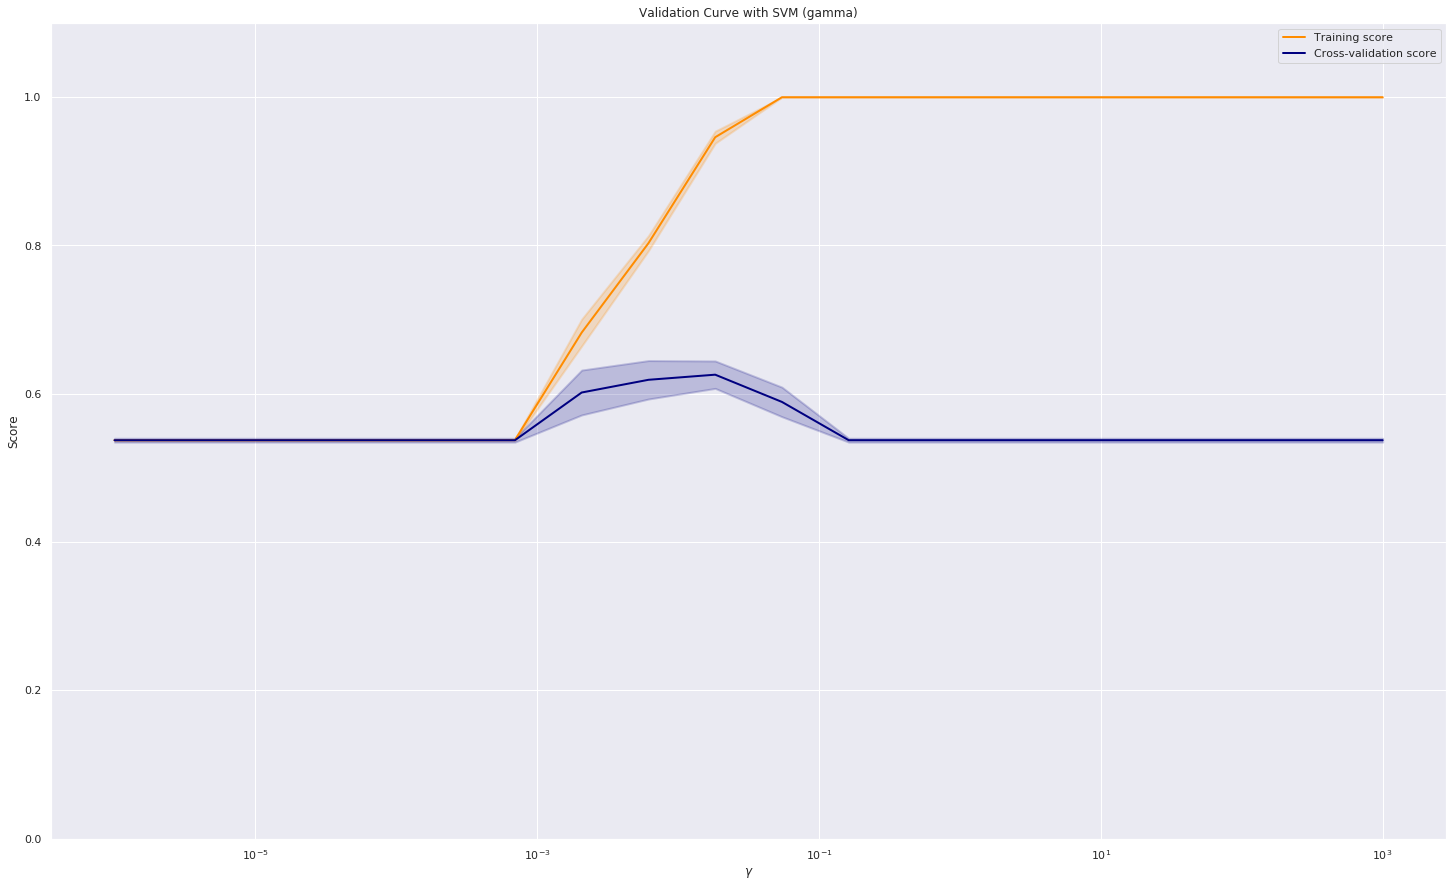

In [227]:
# Plot validation curve with matplotlob

plt.title("Validation Curve with SVM (gamma)")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2

plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)

plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)

plt.legend(loc="best")
plt.gcf().set_size_inches(25, 15)


# Selecting best value for C

In [256]:
#let's plot a validation curve, this time for the "c" hyperparameter

param_range_C = np.logspace(-4 , 2 , 40)

train_scores, test_scores = validation_curve(
    SVC(), X_features_pca, y, param_name="C", param_range=param_range_C,
    scoring="accuracy", n_jobs=1)

train_scores_mean_C = np.mean(train_scores, axis=1)
train_scores_std_C = np.std(train_scores, axis=1)
test_scores_mean_C = np.mean(test_scores, axis=1)
test_scores_std_C = np.std(test_scores, axis=1)

print(test_scores_std_C)

[0.00257161 0.00257161 0.00257161 0.00257161 0.00257161 0.00257161
 0.00257161 0.00257161 0.00257161 0.00257161 0.00257161 0.00257161
 0.00257161 0.00257161 0.00257161 0.00257161 0.00257161 0.00257161
 0.00257161 0.00257161 0.00257161 0.00257161 0.00589068 0.02665232
 0.0141648  0.00704905 0.01849552 0.02606227 0.03613813 0.03619606
 0.04142647 0.03954157 0.0412667  0.0412667  0.0412667  0.0412667
 0.0412667  0.0412667  0.0412667  0.0412667 ]


In [265]:
df_C= pd.DataFrame()

df_C["C"]=param_range_C
df_C["train_scores"]=train_scores_mean_C
df_C["test_scores"]=test_scores_mean_C

df_C["train_sd"]=train_scores_std_C
df_C["test_sd"]=test_scores_std_C

df_C["train_mean"]=train_scores_mean_C
df_C["test_mean"]=test_scores_mean_C

df_C["upper_train"]=train_scores_mean_C + train_scores_std_C
df_C["upper_test"]=test_scores_mean_C + test_scores_std_C

df_C["lower_train"]=train_scores_mean_C - train_scores_std_C
df_C["lower_test"]=test_scores_mean_C - test_scores_std_C

df_C

C  train_scores  test_scores  train_sd   test_sd  train_mean  \
0     0.000100      0.537313     0.537314  0.000642  0.002572    0.537313   
1     0.000143      0.537313     0.537314  0.000642  0.002572    0.537313   
2     0.000203      0.537313     0.537314  0.000642  0.002572    0.537313   
3     0.000289      0.537313     0.537314  0.000642  0.002572    0.537313   
4     0.000412      0.537313     0.537314  0.000642  0.002572    0.537313   
5     0.000588      0.537313     0.537314  0.000642  0.002572    0.537313   
6     0.000838      0.537313     0.537314  0.000642  0.002572    0.537313   
7     0.001194      0.537313     0.537314  0.000642  0.002572    0.537313   
8     0.001701      0.537313     0.537314  0.000642  0.002572    0.537313   
9     0.002424      0.537313     0.537314  0.000642  0.002572    0.537313   
10    0.003455      0.537313     0.537314  0.000642  0.002572    0.537313   
11    0.004924      0.537313     0.537314  0.000642  0.002572    0.537313   
12    0.007017      0.537313     0.537314  0.000642  0.002572    0.537313   
13    0.010000      0.537313     0.537314  0.000642  0.002572    0.537313   
14    0.014251      0.537313     0.537314  0.000642  0.002572    0.537313   
15    0.020309      0.537313     0.537314  0.000642  0.002572    0.537313   
16    0.028943      0.537313     0.537314  0.000642  0.002572    0.537313   
17    0.041246      0.537313     0.537314  0.000642  0.002572    0.537313   
18    0.058780      0.537313     0.537314  0.000642  0.002572    0.537313   
19    0.083768      0.537313     0.537314  0.000642  0.002572    0.537313   
20    0.119378      0.537313     0.537314  0.000642  0.002572    0.537313   
21    0.170125      0.537887     0.537314  0.001594  0.002572    0.537887   
22    0.242446      0.581227     0.546502  0.020669  0.005891    0.581227   
23    0.345511      0.700049     0.568335  0.023995  0.026652    0.700049   
24    0.492388      0.801377     0.607369  0.010932  0.014165    0.801377   
25    0.701704      0.878015     0.619987  0.009058  0.007049    0.878015   
26    1.000000      0.934846     0.625708  0.009404  0.018496    0.934846   
27    1.425103      0.977612     0.632598  0.002499  0.026062    0.977612   
28    2.030918      0.993398     0.630338  0.001949  0.036138    0.993398   
29    2.894266      0.998565     0.629215  0.000907  0.036196    0.998565   
30    4.124626      0.999713     0.642995  0.000574  0.041426    0.999713   
31    5.878016      1.000000     0.642989  0.000000  0.039542    1.000000   
32    8.376776      1.000000     0.642995  0.000000  0.041267    1.000000   
33   11.937766      1.000000     0.642995  0.000000  0.041267    1.000000   
34   17.012543      1.000000     0.642995  0.000000  0.041267    1.000000   
35   24.244620      1.000000     0.642995  0.000000  0.041267    1.000000   
36   34.551073      1.000000     0.642995  0.000000  0.041267    1.000000   
37   49.238826      1.000000     0.642995  0.000000  0.041267    1.000000   
38   70.170383      1.000000     0.642995  0.000000  0.041267    1.000000   
39  100.000000      1.000000     0.642995  0.000000  0.041267    1.000000   

    test_mean  upper_train  upper_test  lower_train  lower_test  
0    0.537314     0.537955    0.539885     0.536671    0.534742  
1    0.537314     0.537955    0.539885     0.536671    0.534742  
2    0.537314     0.537955    0.539885     0.536671    0.534742  
3    0.537314     0.537955    0.539885     0.536671    0.534742  
4    0.537314     0.537955    0.539885     0.536671    0.534742  
5    0.537314     0.537955    0.539885     0.536671    0.534742  
6    0.537314     0.537955    0.539885     0.536671    0.534742  
7    0.537314     0.537955    0.539885     0.536671    0.534742  
8    0.537314     0.537955    0.539885     0.536671    0.534742  
9    0.537314     0.537955    0.539885     0.536671    0.534742  
10   0.537314     0.537955    0.539885     0.536671    0.534742  
11   0.537314     0.537955    0.539885     0.536671    0.534742

In [268]:
title = 'Validation curve'
labels = ['train_scores', 'test_scores']
labels_name= ['train score', 'cross-validation score']
mean= ['train_mean', 'test_mean']
std=['train_sd', 'test_sd']

colors = ['rgb(0,100,80)', 'rgb(300,100,115)']
colors_fill = ['rgb(0,100,80)', 'rgb(300,100,115)']

line_size = [2, 2]

fig_C = go.Figure()

for i in range(0, 2):
    
    
    fig_C.add_trace(go.Scatter(x=df_C["C"], y=df_C[labels[i]], mode='lines',
        name=labels_name[i],
        line=dict(color=colors[i], width=line_size[i]),
        connectgaps=True))
    
    fig_C.add_trace(go.Scatter(x=df_C["C"], y=df_C[mean[i]]+df_C[std[i]],
                         mode='lines',
                         line=dict(color=colors_fill[i], width =0.1),
                         fill='tonexty',
                         name='upper bound'))
    
    fig_C.add_trace(go.Scatter(x=df_C["C"], y=df_C[mean[i]]-df_C[std[i]],
                         mode='lines',
                         line=dict(color=colors_fill[i], width =0.1),
                         fill='tonexty',
                         name='lower bound'))
                                                          
    
annotations = []
   
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='Validation curve',
                              font=dict(family='Arial',
                                        size=30,
                                        color='rgb(37,37,37)'),
                              showarrow=False))

#for y_trace, label, color in zip(y_data, labels, colors):
    # labeling the left_side of the plot
#    annotations.append(dict(xref='paper', x=0.05, y=y_trace[0],
#                                  xanchor='right', yanchor='middle',
#                                  text=label + ' {}%'.format(y_trace[0]),
#                                  font=dict(family='Arial',
                                           # size=16),

fig_C.update_layout(annotations=annotations, xaxis_type="log", xaxis_title='C',
                   yaxis_title='Accuracy score (%)')

fig_C.show()

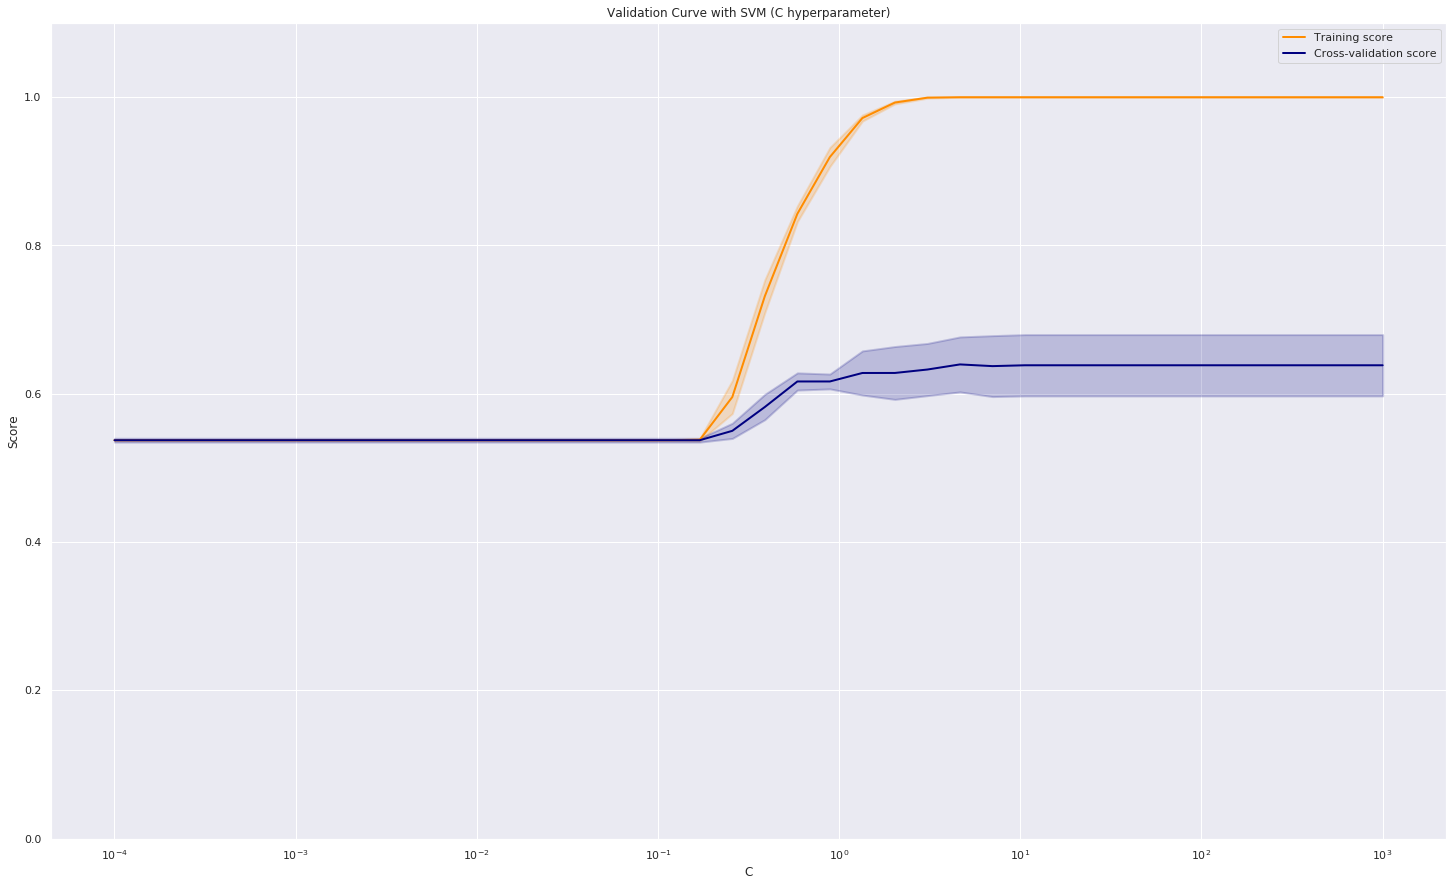

In [103]:
#Validation curve using matplotlib

plt.title("Validation Curve with SVM (C hyperparameter)")
plt.xlabel("C")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2

plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.gcf().set_size_inches(25, 15)

Reunite plots !!! For the deliverable of week 3

In [371]:
from plotly.subplots import make_subplots

title = 'Validation curve'
labels = ['train_scores', 'test_scores']
labels_name= ['train score', 'cross-validation score']
mean= ['train_mean', 'test_mean']
std=['train_sd', 'test_sd']

colors = ['rgb(0,100,80)', 'rgb(300,100,115)']
colors_fill = ['rgb(0,100,80)', 'rgb(300,100,115)']


fig = make_subplots(rows=2, cols=1)

# row 1, col 2 : C

for i in range(0, 2):
    
    fig.add_trace(go.Scatter(x=df_C["C"], y=df_C[labels[i]], mode='lines',
        name=labels_name[i],
        line=dict(color=colors[i], width=line_size[i]),
        connectgaps=True, ), row=2, col=1)
    
    fig.add_trace(go.Scatter(x=df_C["C"], y=df_C[mean[i]]+df_C[std[i]],
                         mode='lines',
                         line=dict(color=colors_fill[i], width =0.1),
                         fill='tonexty',
                         name='upper bound', showlegend=False), row=2, col=1)
    
    fig.add_trace(go.Scatter(x=df_C["C"], y=df_C[mean[i]]-df_C[std[i]],
                         mode='lines',
                         line=dict(color=colors_fill[i], width =0.1),
                         fill='tonexty',
                         name='lower bound', showlegend=False), row=2, col=1)
    

for i in range(0, 2):
    
    fig.add_trace(go.Scatter(x=df_gamma["gamma"], y=df_gamma[labels[i]], mode='lines',
        name=labels_name[i],
        line=dict(color=colors[i], width=line_size[i]),
        connectgaps=True, showlegend=False), row=1, col=1)
    
    fig.add_trace(go.Scatter(x=df_gamma["gamma"], y=df_gamma[mean[i]]+df_gamma[std[i]],
                         mode='lines',
                         line=dict(color=colors_fill[i], width =0.1),
                         fill='tonexty',
                         name='upper bound', showlegend=False), row=1, col=1)
    
    fig.add_trace(go.Scatter(x=df_gamma["gamma"], y=df_gamma[mean[i]]-df_gamma[std[i]],
                         mode='lines',
                         line=dict(color=colors_fill[i], width =0.1),
                         fill='tonexty',
                         name='lower bound', showlegend=False), row=1, col=1)


fig.update_yaxes(title_text="Accuracy score (%)", row=1, col=1)
fig.update_yaxes(title_text="Accuracy score (%)", row=2, col=1)

fig.update_xaxes(title_text="Gamma (y)", type="log", row=1, col=1)
fig.update_xaxes(title_text="C", type="log", row=2, col=1)

fig.update_layout(title_text="Validation curve for different hyperparameters values : SVM estimator", showlegend=True)

fig.show()

print("understanding the impact of hyperparameter value in regard to one parameter at a time")

understanding the impact of hyperparameter value in regard to one parameter at a time


In [362]:
#Using gridsearch to find best parameters

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC # "Support vector classifier"

model = SVC(kernel='linear')

model.get_params().keys()

param_grid = {'C': [0.1, 1, 1.2, 1.3, 1.4, 1.5, 2, 3, 4,  5, 10],
              'gamma': [0.00001, 0.00005,  0.0001, 0.0005, 0.001, 0.005, 0.01, 0,1, 1,0, 1.34, 1.50, 2, 3.5, 4, 4.5, 5]}
            
grid = GridSearchCV (model, param_grid, cv=7)
grid.fit(X_features_pca, y)

print(grid.best_params_)
model_best = grid.best_estimator_

KeyboardInterrupt: 

In [72]:
#best parameters with training data from train-test split

grid_test_train = GridSearchCV (model, param_grid, cv=7)
grid_test_train.fit(Xtrain , ytrain)

print (grid_test_train.best_params_)

model_best_train_test = grid_test_train.best_estimator_

#should I increase the lower range?

{'C': 0.1, 'gamma': 0.0001}


Predict & validate de model. For this next part, the classification will be validated using 3 methods
1. test-train
2. k-fold cross validation
3. leave-one out 

Accuracy score using best parameters is : 0.6514285714285715


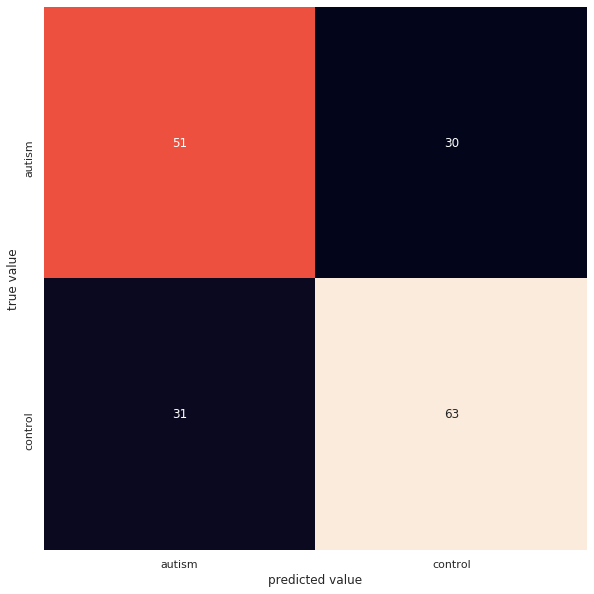

In [79]:
#TRAIN-TEST VALIDATION

y_pred=model_best_train_test.predict(Xtest)

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, y_pred)
sns.heatmap(mat, square=True, annot=True, cbar=False, xticklabels= ["autism", "control"], yticklabels=["autism", "control"])
plt.xlabel('predicted value')
plt.ylabel('true value')


from sklearn.metrics import accuracy_score
print("Accuracy score using best parameters is :", accuracy_score (ytest, y_pred))

plt.gcf().set_size_inches(10, 10)

In [71]:
#cross-validation K-FOLDS

from sklearn.model_selection import cross_val_score
cross_val_score(model_best, X_features_pca, y, cv=10).mean() #cv is the number of folds

0.6738897596656217

In [56]:
#Cross validation leave one out

from sklearn.model_selection import LeaveOneOut
scores = cross_val_score(model_best, X_features_pca, y, cv=LeaveOneOut())
scores.mean()

0.6831228473019518

# KNN

The KNN algorithm is a robust and versatile classifier that is often used as a reference for more complex classifiers such as Artificial Neural Networks (ANNs) and Support Vector Machines (SVMs).

KNN is supervised learning and works with labeled data sets including learning observations (x, y) and is used to capture the relationship between x and y (x = entity, predictor, attribute; y = target, label, class).

The KNN algorithm forms a majority vote between the K instances most similar to a given "invisible" observation.
The similarity is defined according to a distance metric between two data points (common choices: Euclidean distance, Manhattan, Chebyshev, Hamming).

In [364]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.preprocessing import LabelEncoder

In [365]:
param_range_neighbors = np.arange (1, 100, 1)
print(param_range_neighbors)

le = LabelEncoder()
label_encoder_y=le.fit_transform(y)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96
 97 98 99]


N_neighbor hyperparameter

In [366]:
train_scores_neighbors, test_scores_neighbors = validation_curve(
    KNN(), X_features_pca, label_encoder_y, param_name="n_neighbors", param_range=param_range_neighbors,
    scoring="accuracy", n_jobs=1)

train_scores_mean_neighbors = np.mean(train_scores_neighbors, axis=1)
train_scores_std_neighbors = np.std(train_scores_neighbors, axis=1)
test_scores_mean_neighbors = np.mean(test_scores_neighbors, axis=1)
test_scores_std_neighbors = np.std(test_scores_neighbors, axis=1)

print(test_scores_std_neighbors)

[0.05709271 0.03972355 0.04450812 0.04096596 0.03543722 0.03534547
 0.02093919 0.03681807 0.03555307 0.05041391 0.04281536 0.02947809
 0.03181842 0.03918401 0.03224187 0.02486208 0.03298971 0.02679437
 0.02917182 0.02552518 0.03117317 0.03604844 0.02951674 0.03173618
 0.03082401 0.02500813 0.03312927 0.02752582 0.03000947 0.03037446
 0.03133287 0.03056126 0.03161012 0.03422303 0.0350844  0.0343218
 0.03060668 0.02584704 0.02240281 0.03481526 0.02148245 0.02308515
 0.0216136  0.02869446 0.03276439 0.03648663 0.0308263  0.01790065
 0.01686173 0.01731936 0.02018564 0.0217041  0.02036375 0.02215262
 0.02706012 0.02719739 0.01697741 0.02337268 0.02710785 0.0124257
 0.02805529 0.02145348 0.02157513 0.01587146 0.01861234 0.02331492
 0.01905271 0.0220472  0.02493659 0.02391698 0.02873374 0.02848811
 0.02853112 0.03584742 0.03412929 0.03109239 0.03739599 0.03218305
 0.02687768 0.02557909 0.02387085 0.03103921 0.02456631 0.02870576
 0.02699218 0.02506916 0.02878481 0.03252326 0.02756781 0.026229

In [368]:
df_neighbors= pd.DataFrame()

df_neighbors["n_neighbors"]=param_range_neighbors
df_neighbors["train_scores"]=train_scores_mean_neighbors
df_neighbors["test_scores"]=test_scores_mean_neighbors

df_neighbors["train_sd"]=train_scores_std_neighbors
df_neighbors["test_sd"]=test_scores_std_neighbors

df_neighbors["train_mean"]=train_scores_mean_neighbors
df_neighbors["test_mean"]=test_scores_mean_neighbors

df_neighbors["upper_train"]=train_scores_mean_neighbors + train_scores_std_neighbors
df_neighbors["upper_test"]=test_scores_mean_neighbors + test_scores_std_neighbors

df_neighbors["lower_train"]=train_scores_mean_neighbors - train_scores_std_neighbors
df_neighbors["lower_test"]=test_scores_mean_neighbors - test_scores_std_neighbors

df_neighbors

n_neighbors  train_scores  test_scores  train_sd   test_sd  train_mean  \
0             1      1.000000     0.523494  0.000000  0.057093    1.000000   
1             2      0.787598     0.529255  0.008394  0.039724    0.787598   
2             3      0.788173     0.553392  0.006614  0.044508    0.788173   
3             4      0.730197     0.553419  0.011250  0.040966    0.730197   
4             5      0.732491     0.559159  0.002731  0.035437    0.732491   
5             6      0.710964     0.561465  0.010178  0.035345    0.710964   
6             7      0.700054     0.566049  0.006762  0.020939    0.700054   
7             8      0.697188     0.548821  0.006489  0.036818    0.697188   
8             9      0.691731     0.558036  0.006935  0.035553    0.691731   
9            10      0.688005     0.555750  0.008770  0.050414    0.688005   
10           11      0.680539     0.575271  0.006715  0.042815    0.680539   
11           12      0.678244     0.563750  0.008548  0.029478    0.678244   
12           13      0.677958     0.582115  0.006944  0.031818    0.677958   
13           14      0.680251     0.590161  0.004871  0.039184    0.680251   
14           15      0.665903     0.582128  0.008409  0.032242    0.665903   
15           16      0.677671     0.574076  0.007779  0.024862    0.677671   
16           17      0.669057     0.579836  0.010244  0.032990    0.669057   
17           18      0.671933     0.575238  0.009400  0.026794    0.671933   
18           19      0.665326     0.585576  0.008691  0.029172    0.665326   
19           20      0.663605     0.574082  0.007136  0.025525    0.663605   
20           21      0.655853     0.579790  0.008605  0.031173    0.655853   
21           22      0.665612     0.579777  0.007322  0.036048    0.665612   
22           23      0.656141     0.591264  0.006120  0.029517    0.656141   
23           24      0.660734     0.584374  0.007656  0.031736    0.660734   
24           25      0.656715     0.583232  0.006816  0.030824    0.656715   
25           26      0.657575     0.571744  0.009894  0.025008    0.657575   
26           27      0.656717     0.569458  0.009060  0.033129    0.656717   
27           28      0.652987     0.566003  0.012622  0.027526    0.652987   
28           29      0.649826     0.571777  0.006977  0.030009    0.649826   
29           30      0.650975     0.574089  0.005111  0.030374    0.650975   
30           31      0.645235     0.569498  0.004454  0.031333    0.645235   
31           32      0.643228     0.574062  0.007185  0.030561    0.643228   
32           33      0.645236     0.582115  0.007754  0.031610    0.645236   
33           34      0.648969     0.576388  0.006753  0.034223    0.648969   
34           35      0.640065     0.578693  0.007532  0.035084    0.640065   
35           36      0.637197     0.582122  0.008148  0.034322    0.637197   
36           37      0.634038     0.592453  0.008736  0.030607    0.634038   
37           38      0.638343     0.587810  0.008846  0.025847    0.638343   
38           39      0.632316     0.578654  0.008218  0.022403    0.632316   
39           40      0.631458     0.579770  0.004010  0.034815    0.631458   
40           41      0.629157     0.566010  0.010727  0.021482    0.629157   
41           42      0.634615     0.571744  0.008156  0.023085    0.634615   
42           43      0.628299     0.579777  0.011654  0.021614    0.628299   
43           44      0.632318     0.563698  0.016512  0.028694    0.632318   
44           45      0.625143     0.572893  0.010494  0.032764    0.625143   
45           46      0.626292     0.574030  0.010150  0.036487    0.626292   
46           47      0.620837     0.571750  0.011207  0.030826    0.620837   
47           48      0.624281     0.572893  0.005643  0.017901    0.624281   
48           49      0.619399     0.576361  0.012049  0.016862    0.619399   
49           50      0.624854     0.583218  0.008900  0.017319    0.624854   
50           51      0.622

In [370]:
fig_neighbors = go.Figure()

for i in range(0, 2):
    
    
    fig_neighbors.add_trace(go.Scatter(x=df_neighbors["n_neighbors"], y=df_neighbors[labels[i]], mode='lines',
        name=labels_name[i],
        line=dict(color=colors[i], width=line_size[i]),
        connectgaps=True))
    
    fig_neighbors.add_trace(go.Scatter(x=df_neighbors["n_neighbors"], y=df_neighbors[mean[i]]+df_neighbors[std[i]],
                         mode='lines',
                         line=dict(color=colors_fill[i], width =0.1),
                         fill='tonexty',
                         name='upper bound'))
    
    fig_neighbors.add_trace(go.Scatter(x=df_neighbors["n_neighbors"], y=df_neighbors[mean[i]]-df_neighbors[std[i]],
                         mode='lines',
                         line=dict(color=colors_fill[i], width =0.1),
                         fill='tonexty',
                         name='lower bound'))
                                                          
    
annotations = []
   
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='Validation curve',
                              font=dict(family='Arial',
                                        size=30,
                                        color='rgb(37,37,37)'),
                              showarrow=False))

#for y_trace, label, color in zip(y_data, labels, colors):
    # labeling the left_side of the plot
#    annotations.append(dict(xref='paper', x=0.05, y=y_trace[0],
#                                  xanchor='right', yanchor='middle',
#                                  text=label + ' {}%'.format(y_trace[0]),
#                                  font=dict(family='Arial',
                                           # size=16),

fig_neighbors.update_layout(annotations=annotations, xaxis_type="log", xaxis_title='n-neighbors',
                   yaxis_title='Accuracy score (%)')

fig_neighbors.show()

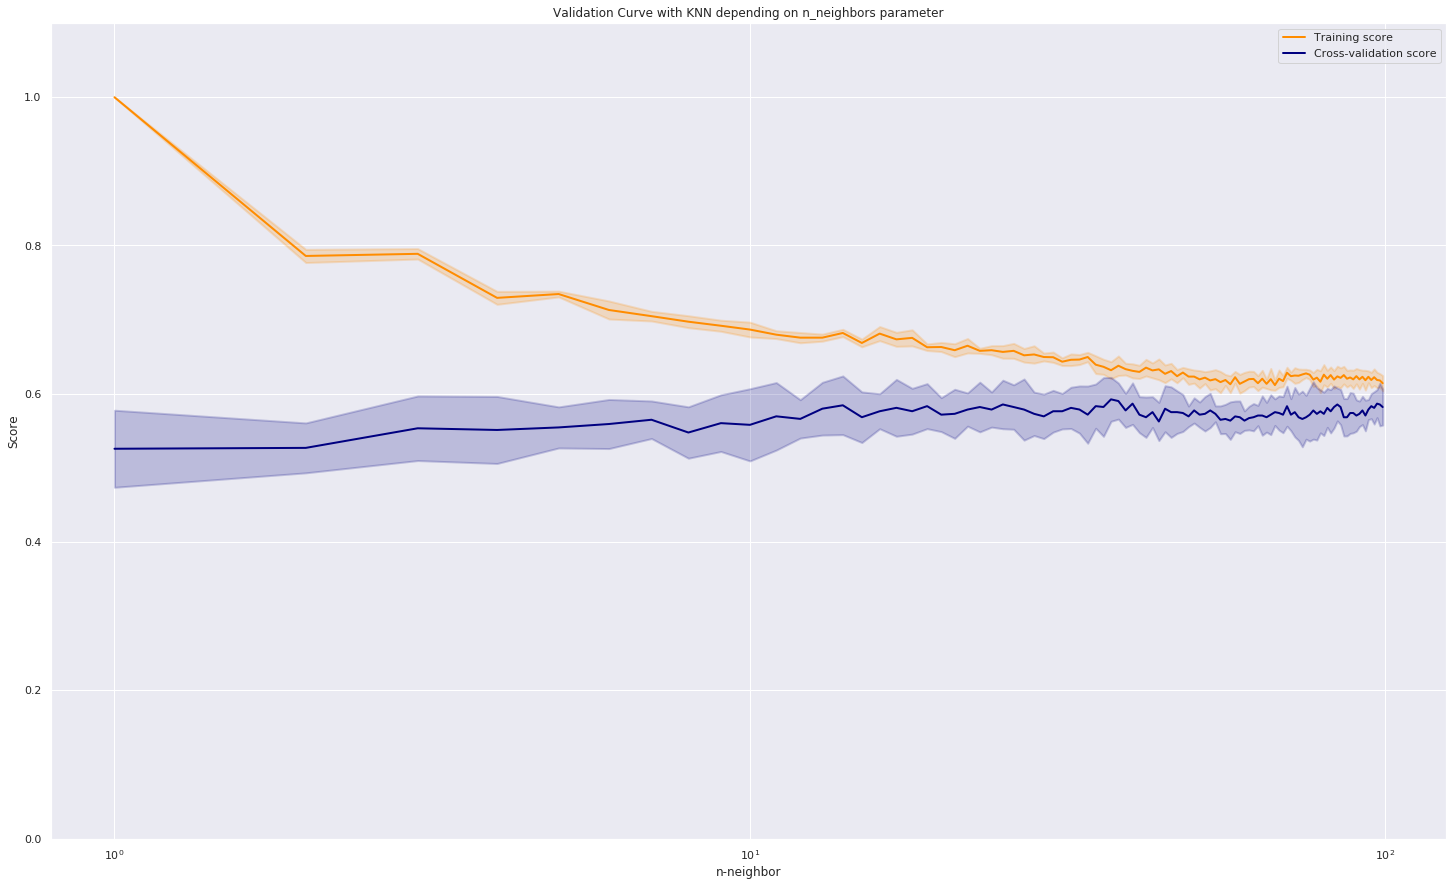

In [114]:
# Plot validation curve with matplotlib

plt.title("Validation Curve with KNN depending on n_neighbors parameter")
plt.xlabel("n-neighbor")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2

plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.gcf().set_size_inches(25, 15)

Gridsearch

In [ ]:
model = KNN()

model.get_params().keys()

param_grid = {'n_neighbors': [1, 2 , 3, 4, 6, 10, 15, 20, 25, 30, 50, 100, 150],
              'metric': ["eucledian", "manhattan",  "chebyshev", "minkowski", "wminkowski", "seuclidean", "mahalanobis"]}
            
grid = GridSearchCV (model, param_grid, cv=7)
grid.fit(X_features_pca, y)

print(grid.best_params_)
model_best = grid.best_estimator_

# Metric (distance) hyperparameter 

In [372]:
param_range_metric=["eucledian", "manhattan",  "chebyshev", "minkowski", "wminkowski", "seuclidean", "mahalanobis"]

train_scores_metric, test_scores_metric = validation_curve(
    KNN(), X_features_pca, label_encoder_y, param_name="metric", param_range=param_range_metric,
    scoring="accuracy", n_jobs=1)

train_scores_mean_metric = np.mean(train_scores_metric, axis=1)
train_scores_std_metric = np.std(train_scores_metric, axis=1)
test_scores_mean_metric = np.mean(test_scores_metric, axis=1)
test_scores_std_metric = np.std(test_scores_metric, axis=1)

print(test_scores_std_metric)

/home/anproulx/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Metric 'eucledian' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid options. Metric can also be a callable function.


/home/anproulx/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: __init__() takes exactly 2 positional arguments (1 given)


/home/anproulx/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: __init__() takes exactly 1 positional argument (0 given)


/home/anproul

[       nan 0.0385386  0.03488638 0.03543722        nan        nan
        nan]


/home/anproulx/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: __init__() takes exactly 2 positional arguments (1 given)


/home/anproulx/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: __init__() takes exactly 1 positional argument (0 given)


/home/anproulx/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Must provide either V or VI for Mahalanobis distance




# Gaussian Naives Bayes

Information on the estimator: Proceeds by assuming each class is drawn from an axis-aligned Gaussian distribution. Because it is so fast and has no hyperparameters to choose, Gaussian Naive Bayes is often a good model to use as a baseline classification, before you explore whether improvements can be found through more sophisticated models.

*Source: Python Data Science Handbook

In [ ]:
from sklearn.naive_bayes import GaussianNB

param_range = np.logspace(-6, 3 , 20)

train_scores, test_scores = validation_curve(
    SVC(), X_features_pca, y, param_name="gamma", param_range=param_range,
    scoring="accuracy", n_jobs=1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

print(test_scores_std)

In [ ]:

#fit model to the data
model_GNB = GaussianNB()
model_GNB.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

yprob = model.predict_proba(Xnew) #gives the probabilistic prediction
yprob[-8:].round(2)

#Possible to do a multidimensional visualization???.... 2016 feat....prob not. 

# Decision Tree and Random forests

Random forests are an example of an ensemble learner built on decision trees. A simple decision tree built on this data will iteratively split the data along one or the other axis according to some quantitative criterion, and at each level assign the label of the new region according to a majority vote of points within it. 

Deepness of the tree: Going to deep in the levels of the tree can lead to overfitting the data. 

The key observation is that the inconsistencies
tend to happen where the classification is less certain, and thus by using
information from both of multiple trees, we might come up with a better result. That's where bagging methods, in this case Random Forests, comes into place. 

*Source: Python Data Science Handbook

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8,
random_state=1)
bag.fit(X, y)

ypred = bag.predict(X)

# see t-SNE

# KDE-based Bayesian classifier

# Comparing performance: Validation 

In [ ]:
#WAYS TO VALIDATE THE DATA

#split train-test set
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, y_model)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

#MORE ACCURATE is cross validation : avoid overfitting for more complex/flexible models

#cross-validation choosing the nb of folds
from sklearn.cross_validation import cross_val_score
cross_val_score(model, X, y, cv=5) #cv is the number of folds


#cross-validation leave-one out -> see Abraham reference....
from sklearn.cross_validation import LeaveOneOut
scores = cross_val_score(model, X, y, cv=LeaveOneOut(len(X)))
scores

#In peer clinic: we talked about cross validating leaving one site out

How to increases the accuracy of estimators

Of core importance is the following question: if our estimator is underperforming, how
should we move forward? There are several possible answers:

• Use a more complicated/more flexible model
• Use a less complicated/less flexible model
• Gather more training samples
• Gather more data to add features to each sample

*Source Python Data Science Handbook

In [ ]:
#General questions: 
#1. No confounds for the ABIDE dataset? ... how will it affect the prediction. 
#2. Is it normal that I get mostly no activation for mean image. (and looks like it is in weird places). 
#3. Why don't I get negative correlation in the matrix....
#4. what would be the advantage of using fisher transform VS the pearson corr. 
#5. Time series shape are not all the same. (78, 64) (128, 64)
#6. nilearn.decoding.SearchLight... interesting to use????
#7. to be able to compare the performance, do we need to have same training-test set?? or if we all do cross-val, it will be ok?

#5. compare matrixes between teammates: the degree of overlapping. 
#6. make sure the images have been preprocessed in a standardise way, otherwise won't be possible to compare models. 

In [ ]:
#how number of subjects affect performances
#visualize matrixes in the form of a connectogram

#At the moment, half the matrix=0. to I have to completly remove half the matrix before doing PCA. 
#see how to deal with confounds....
#for the hmw : interactive plots: https://medium.com/plotly/introducing-plotly-express-808df010143d

#how should I visualize multidimensional data and their classifiers: should I make ndim plot or does it not make sense
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.scatter3D(XS[:, 0], XS[:, 1], XS[:, 2],
             **colorize)

# Unsupervised machine learning  

Defining subclasses within the autism group: unsupervised estimators can highlight interesting aspects of the data
without reference to any known labels. 

# K-MEANS clustering, GMM...

In [ ]:
# Extract most important features
most_important = [np.abs(ls_composantes[i]).argmax() for i in range(nr_composantes)]
most_important_names = [y[most_important[i]] for i in range(nr_composantes)]
dic_feat = {'PC{}'.format(i): most_important_names[i] for i in range(nr_composantes)}
df_feat = pd.DataFrame(dic_feat.values(), index = dic_feat.keys(), columns=['features'])

print(df_feat)

df_feat_comp = df_comps.join(df_feat, how="outer")
print(df_feat_comp)